# Goal: Exploring if there is an optimal city size for curbing carbon emissions.

   Urban areas have huge impact on the energy consumption and carbon emission. It has
been widely accepted that cities have scale of economies because the high concentration of
people and the sharing of infrastructure would enable urban efficiencies.<br /> Research from Boston University and UC Berkeley have confirmed this.<br/>
<br/>
   This project is going to explore the relationship between population size
and carbon emission by comparing different U.S. cities and try to answer the question: are denser cities more efficient in carbon reduction than less dense cities?

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
# Import county to msa data
County_to_Msa = pd.read_csv('CBSA03_MSA99.csv')

In [3]:
County_to_Msa.head()

,FIPS,State,County_Name,County_LSAD,Note,CBSA_2003_Code,CBSA_2003_Title,CBSA_2003_LSAD
0,48059,TX,Callahan,County,NaN,10180,"Abilene, TX",Metro Area
1,48253,TX,Jones,County,NaN,10180,"Abilene, TX",Metro Area
2,48441,TX,Taylor,County,NaN,10180,"Abilene, TX",Metro Area
3,72003,PR,Aguada,Municipio,NaN,10380,"Aguadilla-Isabela-San Sebasti�n, PR",Metro Area
4,72005,PR,Aguadilla,Municipio,NaN,10380,"Aguadilla-Isabela-San Sebasti�n, PR",Metro Area


In [4]:
County_to_Msa = County_to_Msa.drop(County_to_Msa.columns[[3, 4]], axis=1)

In [5]:
County_to_Msa.head()

,FIPS,State,County_Name,CBSA_2003_Code,CBSA_2003_Title,CBSA_2003_LSAD
0,48059,TX,Callahan,10180,"Abilene, TX",Metro Area
1,48253,TX,Jones,10180,"Abilene, TX",Metro Area
2,48441,TX,Taylor,10180,"Abilene, TX",Metro Area
3,72003,PR,Aguada,10380,"Aguadilla-Isabela-San Sebasti�n, PR",Metro Area
4,72005,PR,Aguadilla,10380,"Aguadilla-Isabela-San Sebasti�n, PR",Metro Area


In [6]:
# Import total carbon emission data by county of 2002
Carbon_Emission_County = pd.read_csv('CarbonEmissionCounty.csv')

In [7]:
Carbon_Emission_County.head()

,State,County,FIPS,Total_Carbon_Emission,Pop_2000,Total_PerCapita
0,AL,Autauga,1001,0.256167,43671,5.865829
1,AL,Baldwin,1003,0.450031,140415,3.205008
2,AL,Barbour,1005,0.099370,29038,3.422079
3,AL,Bibb,1007,0.045945,20826,2.206140
4,AL,Blount,1009,0.114776,51024,2.249456


In [8]:
Carbon_Emission_County.columns = ['State', 'County','FIPS','Total_Carbon_Emission','Pop_2000','Total_PerCapita']

In [9]:
a = type(County_to_Msa['FIPS'][0])
b = type(Carbon_Emission_County['FIPS'][0])
print a,b

<type 'str'> <type 'numpy.float64'>


In [10]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False  

In [11]:
vfunc = np.vectorize(canconvert)
indx = vfunc(np.array(County_to_Msa['FIPS']))

In [12]:
County_to_Msa['FIPS'][~indx] = float('NaN') 

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
# Change the data type of FIPS in Carbon_Emission to string
County_to_Msa['FIPS'] = County_to_Msa['FIPS'].astype(float)

In [14]:
# Merge two datasets based on 'FIPS' column
Carbon_Emission = pd.merge(Carbon_Emission_County,County_to_Msa,on=['FIPS'])

In [15]:
# Drop unnessary columns
Carbon_Emission = Carbon_Emission.drop(Carbon_Emission.columns[[0,1,2,6,7,9,10]], axis=1)

In [16]:
Carbon_Emission.head()

,Total_Carbon_Emission,Pop_2000,Total_PerCapita,CBSA_2003_Code
0,0.256167,43671,5.865829,33860
1,0.450031,140415,3.205008,19300
2,0.099370,29038,3.422079,NaN
3,0.045945,20826,2.206140,13820
4,0.114776,51024,2.249456,13820


In [17]:
# Aggregate
Carbon_Emission_Pop = Carbon_Emission.groupby(Carbon_Emission['CBSA_2003_Code']).sum()

In [18]:
# Select all cities with populations greater than 100,000
Carbon_Emission_Pop = Carbon_Emission_Pop[Carbon_Emission_Pop['Pop_2000'] >= 100000]

In [64]:
Carbon_Emission_Pop['Total_PerCapita'] = Carbon_Emission_Pop['Total_Carbon_Emission']/Carbon_Emission_Pop['Pop_2000']*1000000

In [65]:
Carbon_Emission_Pop.head()

,Total_Carbon_Emission,Pop_2000,Total_PerCapita
CBSA_2003_Code,,,
10180,0.649930,160245,4.055850
10420,2.048257,694960,2.947302
10500,0.977522,157833,6.193391
10540,0.384084,103069,3.726471
10580,2.816506,825875,3.410330


### Ranking of cities by per capita emission

In [66]:
Carbon_Emission_Pop.sort(columns='Total_PerCapita',ascending=False).head()

,Total_Carbon_Emission,Pop_2000,Total_PerCapita
CBSA_2003_Code,,,
22140,8.453822,113801,74.286004
48260,6.722961,132008,50.928439
22380,5.632171,116320,48.419627
38220,5.068528,107341,47.218939
31740,4.928487,108999,45.215892


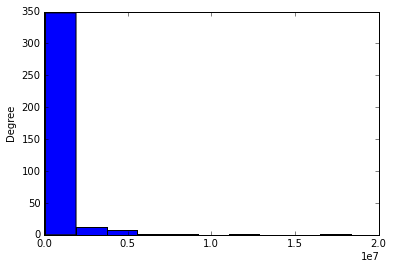

In [100]:
Carbon_Emission_Pop['Pop_2000'].describe()
plt.figure()
Carbon_Emission_Pop['Pop_2000'].plot(kind='hist')

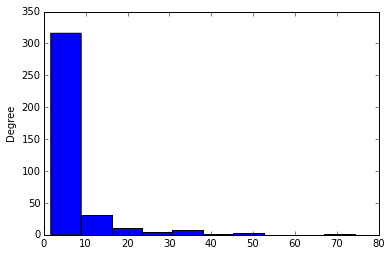

In [101]:
Carbon_Emission_Pop['Total_PerCapita'].describe()
plt.figure()
Carbon_Emission_Pop['Total_PerCapita'].plot(kind='hist')

In [69]:
population = Carbon_Emission_Pop['Pop_2000']
emission_per_capita = Carbon_Emission_Pop['Total_PerCapita']

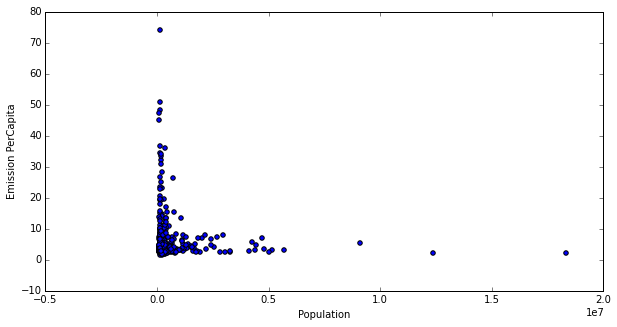

In [102]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(population,emission_per_capita)
ax.set_ylabel('Emission PerCapita')
ax.set_xlabel('Population')

In [71]:
# Normalize population and emission per capita data
X = (population-population.mean())/population.std()
Y = (emission_per_capita - emission_per_capita.mean())/emission_per_capita.std()

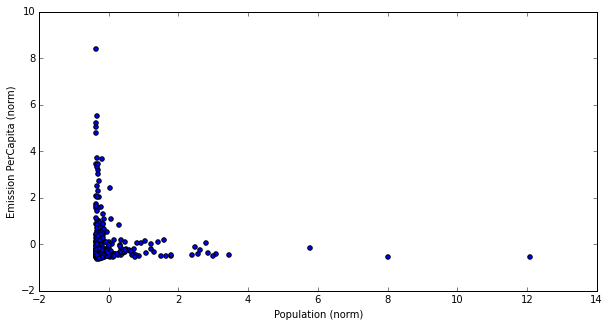

In [103]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(X,Y)
ax.set_ylabel('Emission PerCapita (norm)')
ax.set_xlabel('Population (norm)')

In [73]:
pr = scipy.stats.pearsonr(X, Y)
print pr

(-0.096914301009078746, 0.061505002548852522)


In [89]:
# Use Log Scale
X_log = np.log10(population)
Y_log = np.log10(emission_per_capita)

-0.0892633920394 1.17434992255


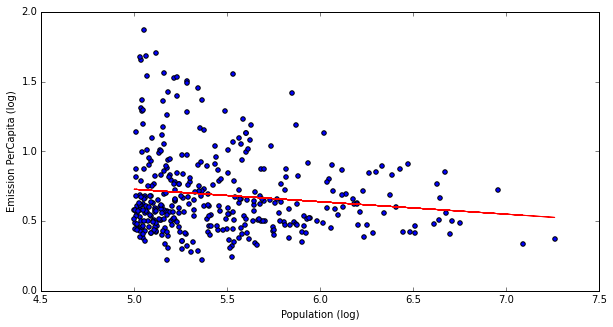

In [98]:
model1 = sm.OLS(Y_log, sm.add_constant(X_log ), missing='drop').fit()  
print model1.params[1], model1.params[0]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(X_log,Y_log)
ax.plot(X_log,X_log*model1.params[1]+model1.params[0],color='red')
ax.set_ylabel('Emission PerCapita (log)')
ax.set_xlabel('Population (log)')

In [94]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Total_PerCapita   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     6.751
Date:                Sat, 14 Nov 2015   Prob (F-statistic):            0.00974
Time:                        21:22:34   Log-Likelihood:                -69.660
No. Observations:                 373   AIC:                             143.3
Df Residuals:                     371   BIC:                             151.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.1743      0.188      6.230      0.000         0.804     1.545
Pop_2000      -0.0893      0.034     -2.598      0.010        -0.157    -0.022
==============================================================================
Omnibus:                       86.637   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.275
Skew:                           1.325   Prob(JB):                     8.59e-34
Kurtosis:                       4.666   Cond. No.                         70.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Result:
### The Pearson correlation efficient shows that there is no correlation between city population size and carbon emission per capita even after normalizing them by the log scale. The r-squared of linear regression model to fit the data of population and carbon emission per capita is only 0.018.

In [95]:
# Second Degree Curve: log(Population) vs log(Emission PerCapita)
df_notnan = Carbon_Emission_Pop.dropna(axis=0)
curvemodel = smf.ols(formula = "y ~ x + I((x)) + I((x)**2) ", 
        data={'x':np.log(df_notnan['Pop_2000']),'y':np.log(df_notnan['Total_PerCapita']) })
model2 = curvemodel.fit()

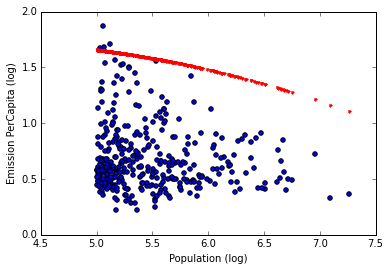

In [96]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_log,Y_log)
ax.plot(X_log, model2.predict(),'k.',c='r')
ax.set_ylabel('Emission PerCapita (log)')
ax.set_xlabel('Population (log)')

### Then I split the cities into two groups, which are surburbs and metropolitans based on the definition that cities which have population larger than one million are metropolis.

In [104]:
# Split the dataset into surburbs and metropolis  (pop = 1m)
# Select all cities with populations greater than 1,000,000
metropoli = Carbon_Emission_Pop[Carbon_Emission_Pop['Pop_2000'] >= 1000000]
surburb = Carbon_Emission_Pop[Carbon_Emission_Pop['Pop_2000'] < 1000000]

-0.211509016055 4.54662937979


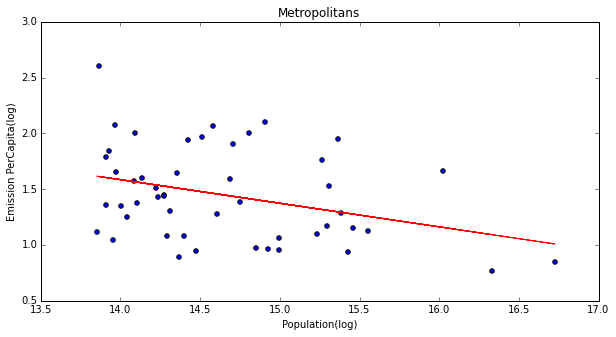

In [109]:
pop1 = np.log(metropoli['Pop_2000'])
emission1 = np.log(metropoli['Total_PerCapita'])

model3 = sm.OLS(emission1, sm.add_constant(pop1), missing='drop').fit()  
print model3.params[1], model3.params[0]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(pop1,pop1*model3.params[1]+model3.params[0],color='red')
ax.scatter(pop1,emission1)
ax.set_title("Metropolitans")
ax.set_ylabel('Emission PerCapita(log)')
ax.set_xlabel('Population(log)')

In [110]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Total_PerCapita   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     6.241
Date:                Sat, 14 Nov 2015   Prob (F-statistic):             0.0160
Time:                        21:45:38   Log-Likelihood:                -22.857
No. Observations:                  49   AIC:                             49.71
Df Residuals:                      47   BIC:                             53.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          4.5466      1.242      3.660      0.001         2.048     7.045
Pop_2000      -0.2115      0.085     -2.498      0.016        -0.382    -0.041
==============================================================================
Omnibus:                        3.324   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.991
Skew:                           0.523   Prob(JB):                        0.224
Kurtosis:                       2.390   Cond. No.                         325.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-0.116133663895 3.02630699643


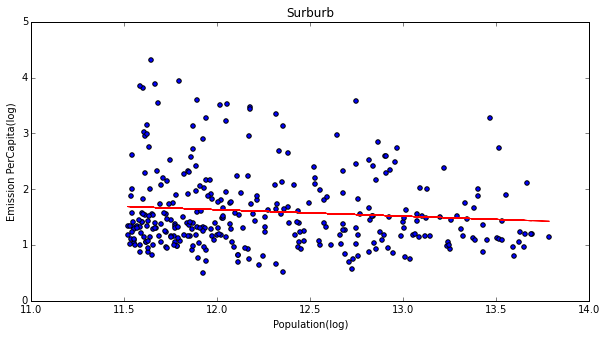

In [111]:
pop2 = np.log(surburb['Pop_2000'])
emission2 = np.log(surburb['Total_PerCapita'])

model4 = sm.OLS(emission2, sm.add_constant(pop2), missing='drop').fit()  
print model4.params[1], model4.params[0]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(pop2,pop2*model4.params[1]+model4.params[0],color='red')
ax.scatter(pop2,emission2)
ax.set_title("Surburb")
ax.set_ylabel('Emission PerCapita(log)')
ax.set_xlabel('Population(log)')

In [112]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Total_PerCapita   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.315
Date:                Sat, 14 Nov 2015   Prob (F-statistic):             0.0696
Time:                        21:47:49   Log-Likelihood:                -345.81
No. Observations:                 324   AIC:                             695.6
Df Residuals:                     322   BIC:                             703.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.0263      0.784      3.859      0.000         1.483     4.569
Pop_2000      -0.1161      0.064     -1.821      0.070        -0.242     0.009
==============================================================================
Omnibus:                       73.225   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.347
Skew:                           1.320   Prob(JB):                     4.46e-27
Kurtosis:                       4.421   Cond. No.                         248.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Results:
### Among metropolitans, there is a trend that the denser a city is, the less carbon emission per capita it has. The coefficient is -0.2115 and the significance level of the coefficient is 0.016.However, among the surburbs, the relationship between population and carbon emission per capita is not obvious. The significant level of the coefficient is 0.07, which is more than 0.05.

# Conclusion:
### There is not an optimal city size. Whether making a city denser will help cut its carbaon emissions or not depends on what type of city it is. If the city were a metropolitan,increasing its populatino size would help cut its carbon emission per capita. That could be explained by the economies of scale as big cities have good public transportation infrastructure.On the contrary, if the city were a surburb, increasing its population size might create more carbon footprints as a result of more private cars.